In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
#dataset
from sklearn.datasets import fetch_california_housing
print('Modules loaded successfully')


Modules loaded successfully


In [2]:
data_dict=fetch_california_housing()
data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(data_dict['target_names'])

['MedHouseVal']


In [5]:
df=pd.DataFrame(data_dict['data'],columns=data_dict['feature_names'])
df['MedHouseVal']=data_dict['target']
df.sample()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20497,6.1383,23.0,7.203562,1.033079,1284.0,3.267176,34.3,-118.7,2.441


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5785,3.9054,14.0,4.088398,1.044199,1681.0,1.857459,34.16,-118.25,2.0


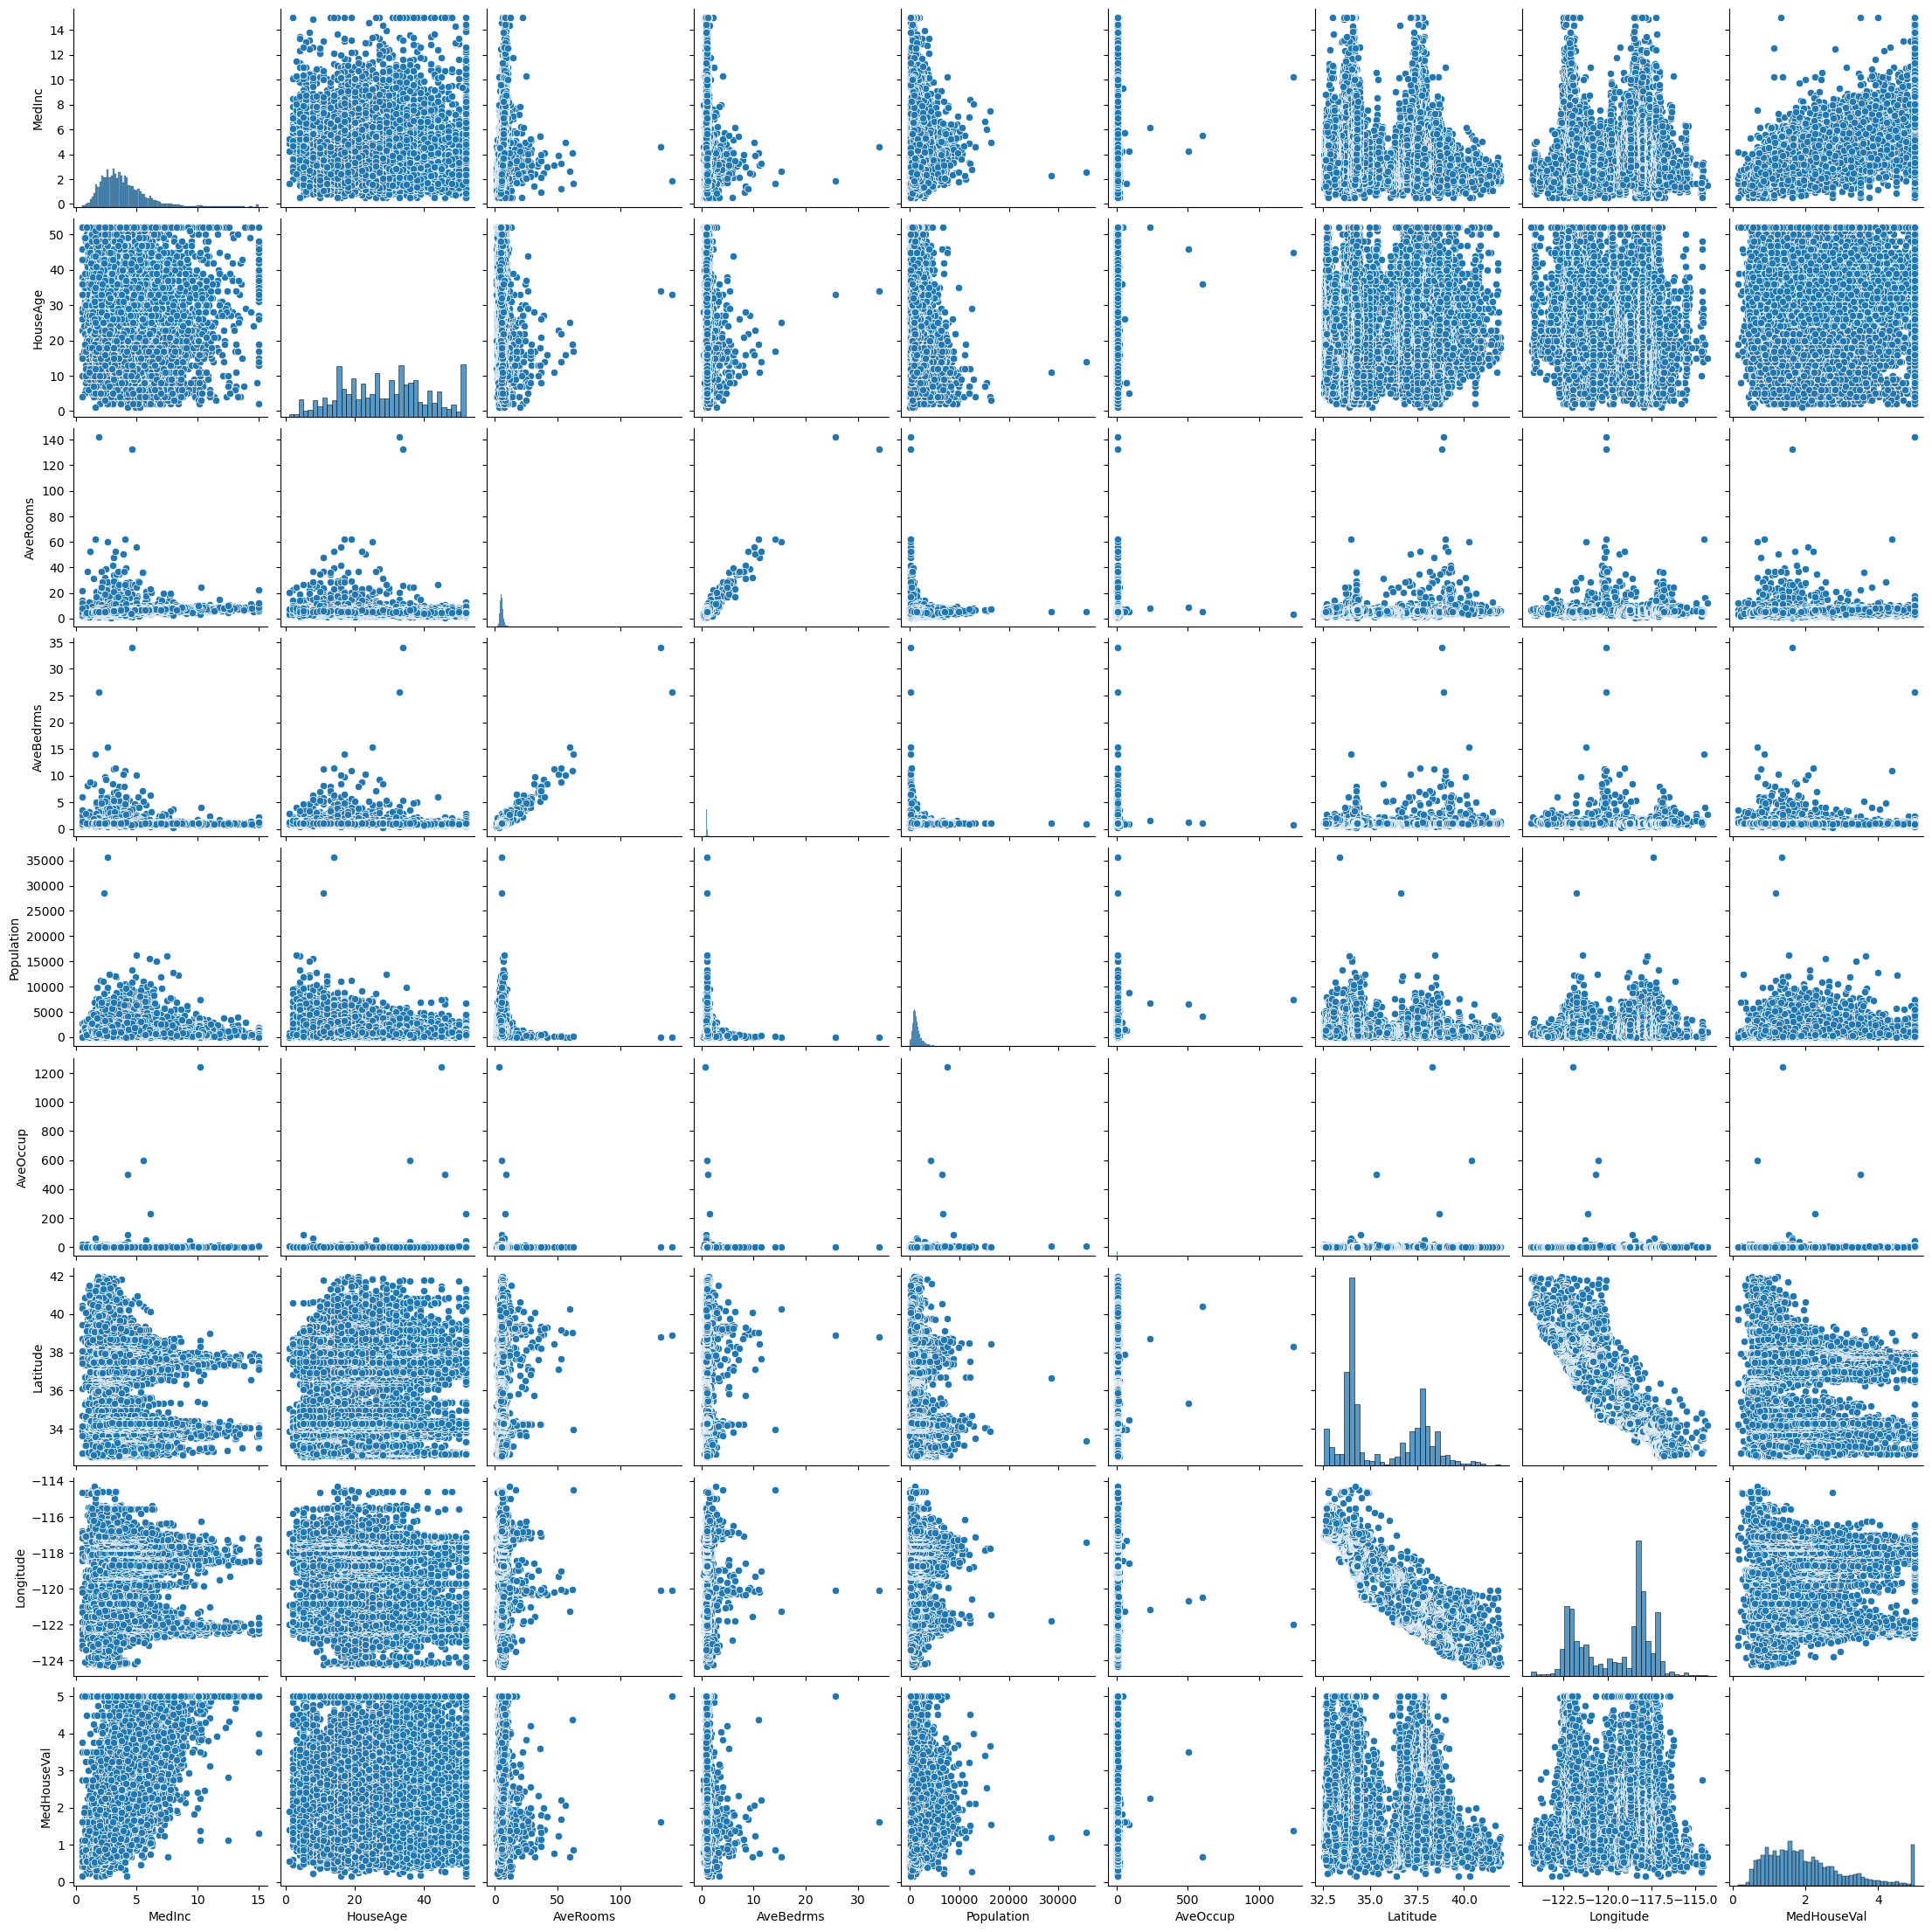

In [10]:
sns.pairplot(data=df)
plt.show()

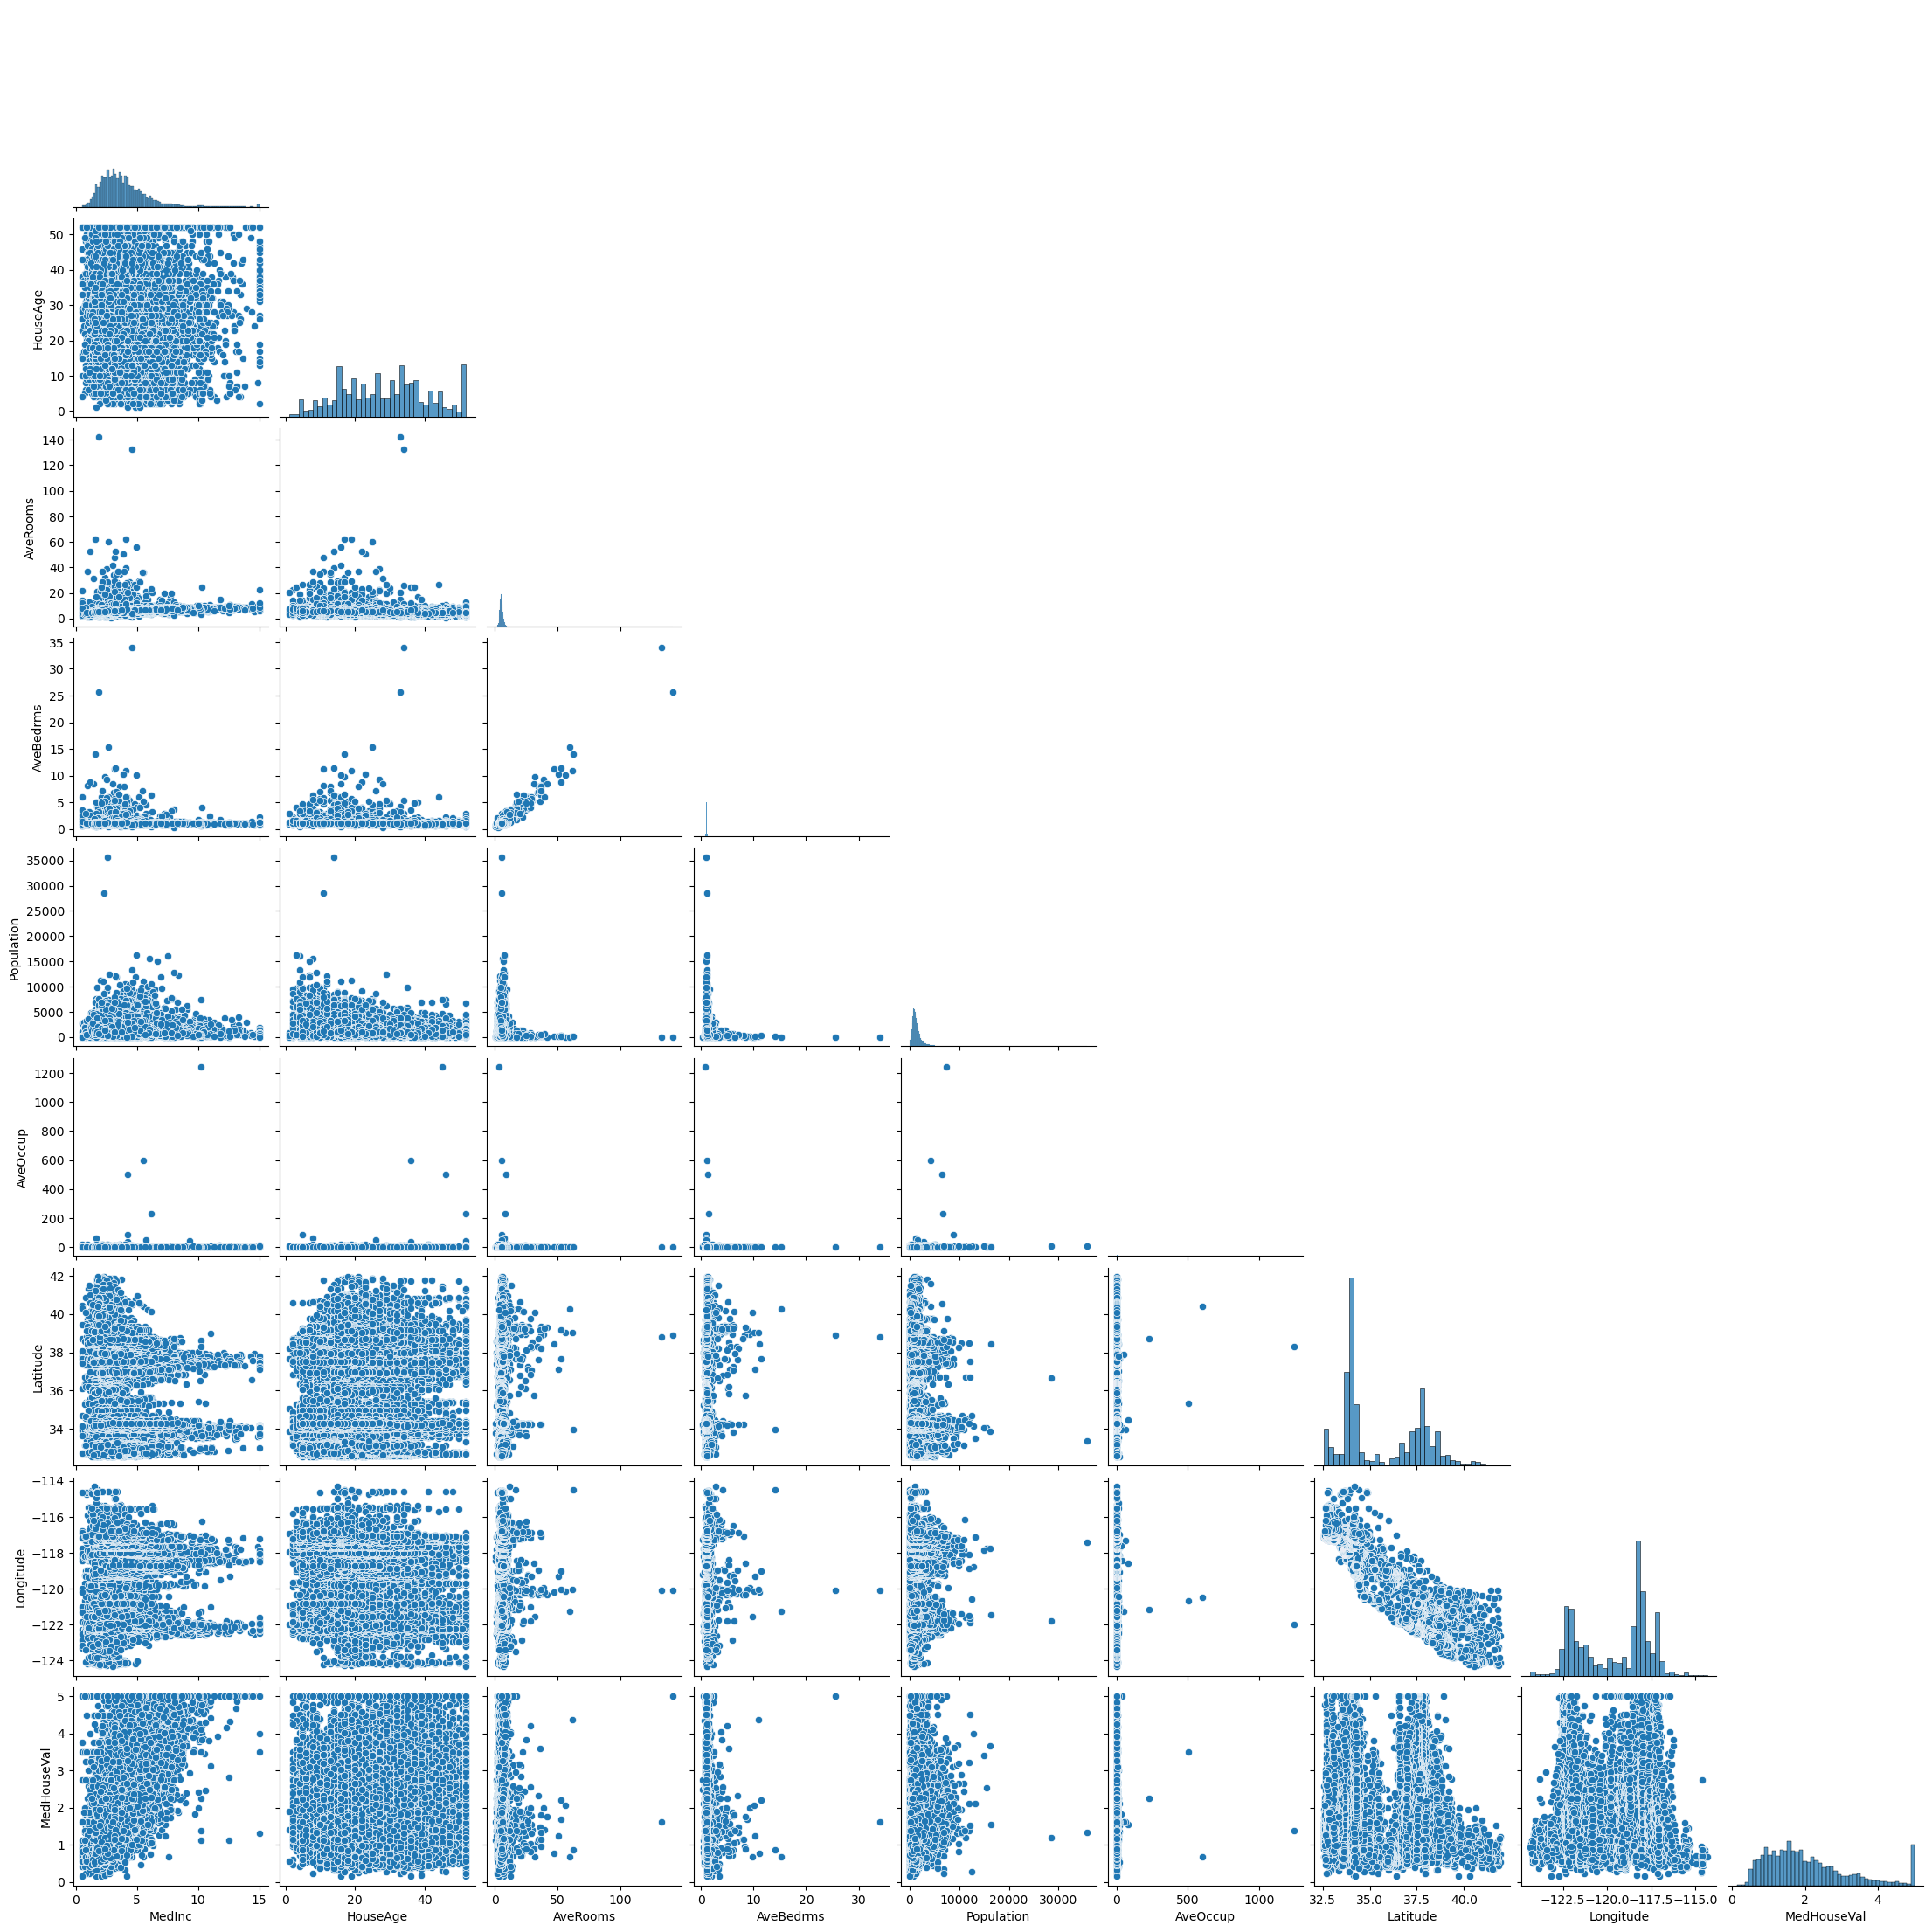

In [11]:
sns.pairplot(data=df,corner=True)
plt.show()

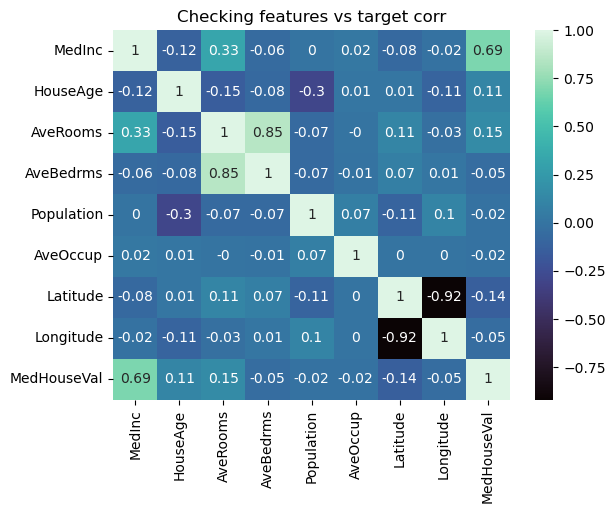

In [12]:
plt.title('Checking features vs target corr')
sns.heatmap(df.corr().round(2),annot=True,cmap='mako')#colormap
plt.show()

In [13]:
# Data Describe()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


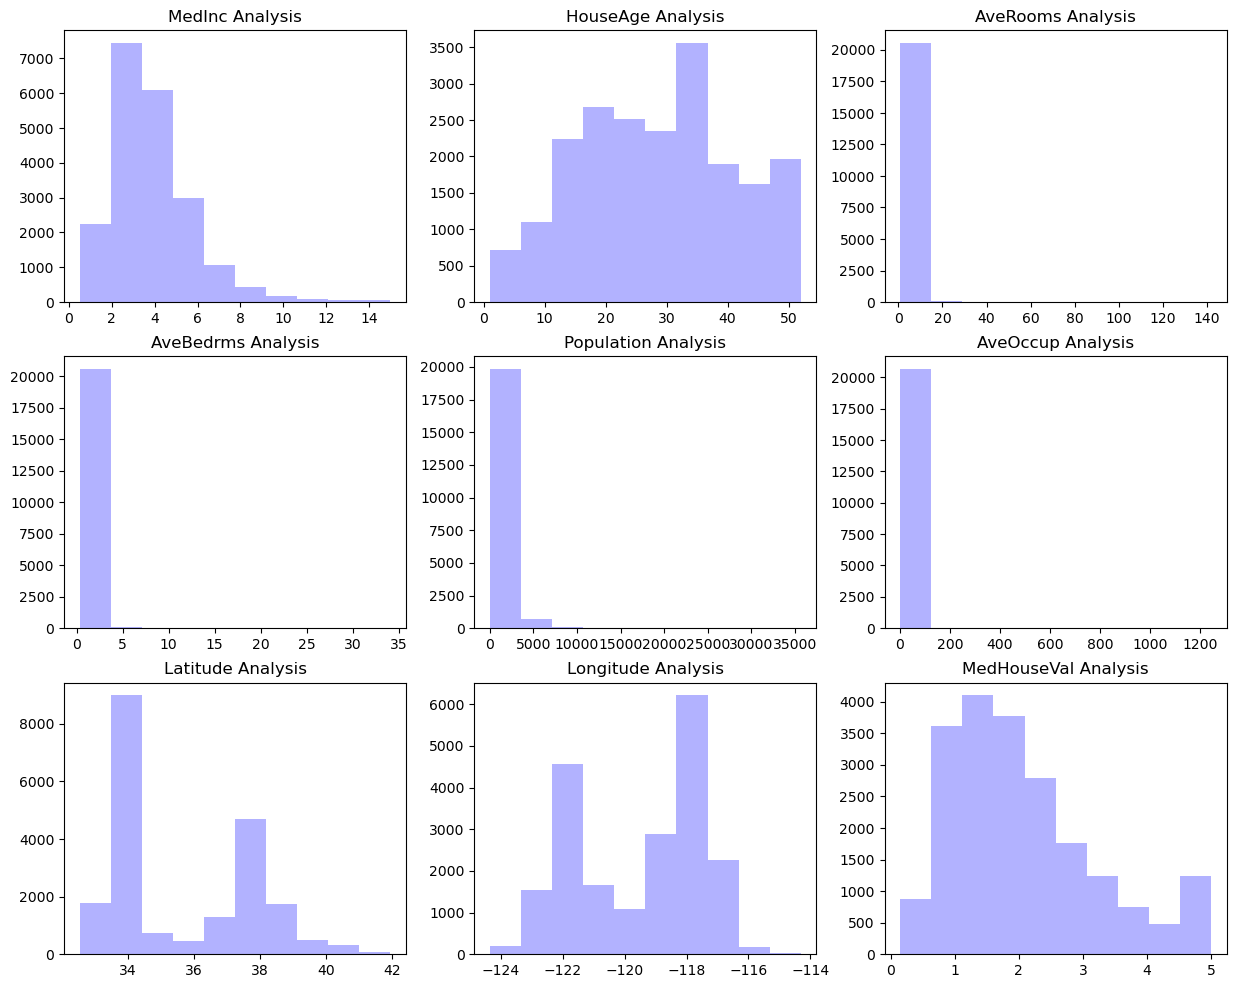

In [14]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()

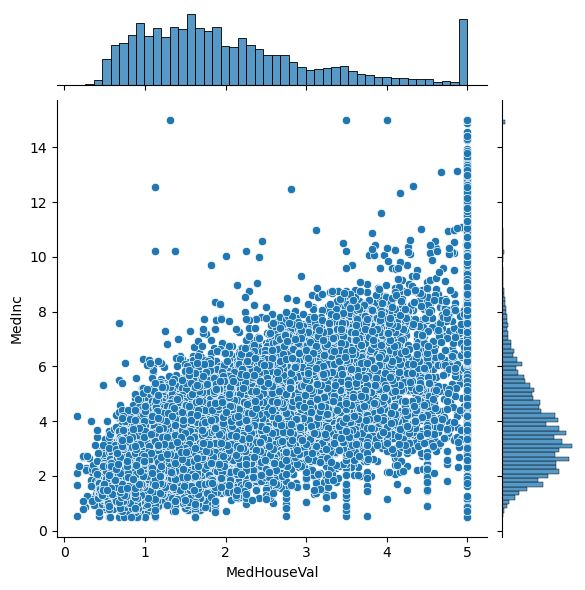

In [15]:
# Distribution of target Value MedHousevalue
sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

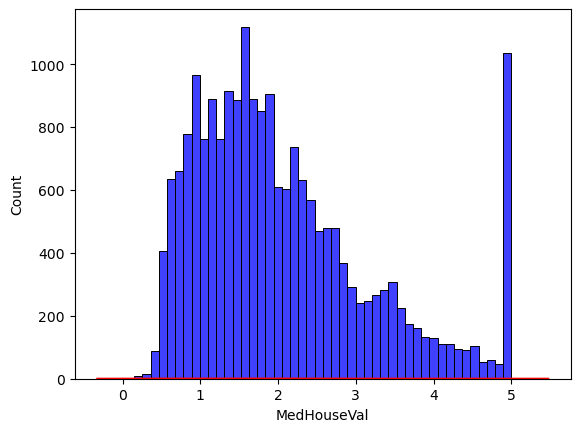

In [16]:
sns.histplot(data = df, x = 'MedHouseVal', color = 'b')
sns.kdeplot(data = df, x = 'MedHouseVal',color  = 'r')
plt.show()

In [17]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [18]:
# Convert data to Same Scale for better prediction
# normalization = MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
y = df['MedHouseVal']
scaler = MinMaxScaler()
scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)
print('Done')

Done


In [19]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


In [20]:
print('hello')

hello


In [21]:
# Train test Split: Divide into train Part Test Part
# train_test_split: Func: divide


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2, random_state= 150 )
print('Done')

Done


In [22]:
b,a,c,d = [23,534,6,65] # Unpacking
print(a)

534


In [23]:
import random
random.seed(56)
random.randint(1,50)

36

In [24]:
print('Shape of Xtrain',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)


Shape of Xtrain (16512, 8)
Shape of X_test (4128, 8)
Shape of y_train (16512,)
Shape of y_test (4128,)


In [25]:
X_scaled.shape

(20640, 8)

In [26]:
20640*.8

16512.0

In [27]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Object Creation

lr_model.fit(X_train,y_train) # Trainig Model

LinearRegression()

In [28]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [29]:
# 20 %: Actual answer: y_test, Predcited: y_pred

lr_compare_df = pd.DataFrame({'Actual House price':y_test,
             'Predicted House price':y_pred})

print('Done')

Done


In [30]:
lr_compare_df

,Actual House price,Predicted House price
13569,0.93300,1.600182
6743,2.79900,2.290845
13230,3.92900,2.618237
18799,0.52000,0.209449
1052,1.23600,1.236397
...,...,...
19369,2.68800,2.276322
12808,0.69300,0.976300
6589,5.00001,3.410402
19719,0.71200,0.896588


In [31]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5295622016018944


In [32]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.5322170539831861


In [33]:
lr_rmse = lr_mse**.5

print('Lr RMSE',lr_rmse)

Lr RMSE 0.7295320787896761


In [34]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)


Training Score 0.6081032361747606
testing Score 0.5984024263886711


In [35]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7964,0.346078,0.470588,0.042871,0.019763,0.047927,0.002156,0.174283,0.538845


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
1518,0.415408,0.333333,0.045699,0.026525,0.036688,0.001876,0.422954,0.25,1


In [37]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending= False)

# Because Latitude and Longitude has high corr and vif close to 10 we can drop one or both

,Features,VIF factor
8,Intercept,177.876568
6,Latitude,9.316394
7,Longitude,8.977028
2,AveRooms,8.752272
3,AveBedrms,7.460090
0,MedInc,2.459841
1,HouseAge,1.240290
4,Population,1.136960
5,AveOccup,1.009297


In [38]:
col = list(X.columns)
col.remove('Latitude')

# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
10000,0.165784,0.823529,0.034221,0.02359,0.026038,0.001342,0.018924


In [39]:
def built_model(ml_model, col):
    from sklearn.metrics import r2_score
    
    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model


In [40]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [41]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.543073,0.531162,0.570342,0.621327,0.788243,0.531162


In [42]:
from sklearn.linear_model import Lasso, Ridge

In [43]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [44]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.52581,0.513927,0.59007,0.644168,0.802601,0.513927


In [45]:
col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [46]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)
    break

  display(clear=True)

Score is: 0.6067450510265389
Best random State 178


In [47]:
 X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
built_model(LinearRegression,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.538395,0.551215,0.558446,0.576246,0.759109,0.551215


In [48]:
 X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
built_model(Ridge,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.538395,0.551203,0.558467,0.576262,0.759119,0.551203


In [49]:
final_model

Ridge()

In [50]:
import pickle

with open('house_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaller Saved Successfully!!')

ML model and Scaller Saved Successfully!!


In [51]:
print('123')

123


### Step8: Website Building and LocalHost deployment 

In [52]:
#pip install streamlit

In [53]:
import streamlit as st
print('done')

done


In [54]:
#st.title('california housing price prediction')

In [55]:
!streamlit run house.py

^C


In [62]:
os.getcwd()

'C:\\Users\\ashme'

In [57]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [58]:
df.to_csv('california.csv')
print('done')

done


In [59]:
for i in df[col]:
    max_value,min_value=df[i].agg(['min','max'])
    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 15.0001
max MedInc 0.4999
min HouseAge 52.0
max HouseAge 1.0
min AveRooms 141.9090909090909
max AveRooms 0.8461538461538461
min AveBedrms 34.06666666666667
max AveBedrms 0.3333333333333333
min Population 35682.0
max Population 3.0
min AveOccup 1243.3333333333333
max AveOccup 0.6923076923076923


In [60]:
temp_df=pd.read_csv('california.csv')
for i in temp_df[col]:
    max_value,min_value=df[i].agg(['min','max'])